In [20]:
import pandas as pd
import numpy as np

In [21]:
metallican_path = r'C:\Users\mp_ma\OneDrive - polymtlus\Desktop\POST_DOC\Project\canada_metal_sustainability_db'

# Import MetalliCan tables

In [22]:
main_table = pd.read_csv(metallican_path + r'\database\CSV\main_table.csv')
production_table = pd.read_csv(metallican_path + r'\database\CSV\production_table.csv')
tech_attributes_table = pd.read_csv(metallican_path + r'\database\CSV\tech_attributes_table.csv')
env_table = pd.read_csv(metallican_path + r'\database\CSV\environment_table_new.csv')
technosphere_table = pd.read_csv(metallican_path + r'\database\CSV\technosphere_table.csv')
archetypes_table = pd.read_csv(metallican_path + r'\database\CSV\archetypes_table.csv')
land_table = pd.read_csv(metallican_path + r'\database\CSV\land_occupation_table.csv')

# Create samples based on the best available data

In [23]:
ids_production = set(production_table[['main_id', 'facility_group_id']].apply(tuple, axis=1))
ids_ta = set(tech_attributes_table[['main_id', 'facility_group_id']].apply(tuple, axis=1))
ids_environmental = set(env_table[['main_id', 'facility_group_id']].apply(tuple, axis=1))
ids_technosphere = set(technosphere_table[['main_id', 'facility_group_id']].apply(tuple, axis=1))

In [31]:
# Find the intersection of these sets to get common IDs
best_ids = ids_production & ids_ta & ids_environmental & ids_technosphere
second_best_ids = ids_production & ids_ta & ids_environmental
third_best_ids = ids_production & ids_environmental & ids_technosphere

In [32]:
len(best_ids)

19

In [33]:
len(second_best_ids)

28

In [34]:
len(third_best_ids)

31

In [36]:
def get_info_for_ids(df, id_pairs):
    # Extract facility_group_ids from id_pairs
    facility_group_ids = {id_pair[1] for id_pair in id_pairs if pd.notna(id_pair[1])}

    # Create a boolean mask for rows that match any of the id pairs or have a facility_group_id in the set
    mask = df.apply(lambda row: (
        (row['main_id'], row['facility_group_id']) in id_pairs or
        row['facility_group_id'] in facility_group_ids
    ), axis=1)

    # Use the mask to filter the DataFrame
    filtered_df = df[mask]
    return filtered_df

In [37]:
main_best_df = get_info_for_ids(main_table, best_ids)
main_second_best_df = get_info_for_ids(main_table, second_best_ids)
main_third_best_df = get_info_for_ids(main_table, third_best_ids)

In [29]:
main_best_df

,main_id,facility_name,facility_group_id,facility_group_name,company_id,company_name,city,province,status,activity_status,...,mining_processing_type,commodity_group,commodities,owners,operators,operation_periods,company_URL,facility_URL,MDO_URL,source_id
13,ON-MAIN-687b8c8d,Island,NaN,NaN,CMP-3a4ccc7f,Alamos Gold Inc,Dubreuilville,Ontario,active_facility,NaN,...,"Underground, concentrator",Precious metals,Gold,Alamos Gold Inc (100%),Alamos Gold Inc,2007–open,https://alamosgold.com,https://www.alamosgold.com/operations/producin...,https://miningdataonline.com/property/1484/you...,NaN
14,ON-MAIN-7607a50e,Young-Davidson,NaN,NaN,CMP-3a4ccc7f,Alamos Gold Inc,Matachewan,Ontario,active_facility,NaN,...,"Underground, concentrator",Precious metals,Gold,Alamos Gold Inc (100%),Alamos Gold Inc,1917–1957; 2010–open,https://alamosgold.com,https://www.alamosgold.com/operations/producin...,https://miningdataonline.com/property/7/Island...,NaN
54,BC-MAIN-ed23117f,Mount Milligan,NaN,NaN,CMP-fa032e20,Centerra Gold Inc,Fort St. James,British Columbia,active_facility,NaN,...,"Open-pit, concentrator",Base metals and precious metals,"Copper, gold, silver",Centerra Gold Inc (100%),Thompson Creek Metals Company Inc,2014–open,https://www.centerragold.com/,https://www.centerragold.com/operations/mount-...,https://miningdataonline.com/property/59/Mount...,NaN
69,QC-MAIN-f9e41c2a,Lamaque,NaN,NaN,CMP-64d60fd7,Eldorado Gold,Val-d’Or,Quebec,active_facility,NaN,...,"Underground, concentrator",Precious metals,Gold,Eldorado Gold (100%),Eldorado Gold,NaN,https://www.eldoradogold.com/,https://www.eldoradogold.com/assets/operations...,https://miningdataonline.com/property/1694/Lam...,NaN
119,BC-MAIN-599152a0,Copper Mountain,NaN,NaN,CMP-12afc634,Hudbay Minerals Inc,Princeton,British Columbia,active_facility,NaN,...,"Open-pit, concentrator",Base metals,"Copper, gold, silver",Hudbay Minerals Inc (100%),Copper Mountain Mine Ltd,1884–1958; 2011–open,https://hudbayminerals.com/canada/default.aspx,-,https://miningdataonline.com/property/1/copper...,NaN
127,QC-MAIN-02884fb5,Westwood-Doyon,NaN,NaN,CMP-3d0a95b7,IAMGOLD Corporation,Cadillac,Quebec,active_facility,NaN,...,"Underground, concentrator",Precious metals,"Gold, silver",IAMGOLD Corporation (100%),IAMGOLD Corporation,NaN,https://www.iamgold.com/English/home/default.aspx,https://www.iamgold.com/English/operations/wes...,https://miningdataonline.com/property/77/Westw...,NaN
128,ON-MAIN-a3c56a83,Lac des Iles,NaN,NaN,CMP-967076a1,Impala Canada Ltd,Thunder Bay,Ontario,active_facility,NaN,...,"Open-pit, underground, concentrator",Precious metals,"Platinum group metals, gold, nickel, copper, c...",Implats (100%),Impala Canada Ltd,NaN,https://www.nap.com/home/default.aspx,https://www.nap.com/operations/default.aspx#op...,https://miningdataonline.com/property/55/Lac-d...,NaN
160,BC-MAIN-aa76f6f2,New Afton,NaN,NaN,CMP-d94be190,New Gold Inc,Kamloops,British Columbia,active_facility,NaN,...,"Underground, concentrator",Base metals and precious metals,"Gold, copper, silver",New Gold Inc (100%),NaN,2012–open,https://newgold.com/home/default.aspx,https://newgold.com/assets/#new-afton-mine,https://miningdataonline.com/property/11/new-a...,NaN
161,ON-MAIN-0aadf28f,Rainy River,NaN,NaN,CMP-d94be190,New Gold Inc,Fort Frances,Ontario,active_facility,NaN,...,"Open-pit, underground, concentrator",Precious metals,"Gold, silver",New Gold Inc (100%),NaN,2017–open,https://newgold.com/home/default.aspx,https://newgold.com/assets/#rainy-river-mine,https://miningdataonline.com/property/69/Rainy...,NaN
162,ON-MAIN-1c674cd0,Borden,GRP-0d911886,Porcupine complex,CMP-4a434d72,Newmont Corporation,Chapleau,Ontario,active_facility,NaN,...,"Open-pit, underground",Precious metals,Gold,Discovery Silver Corp (100%),NaN,2019–open,https://www.newmont.com/home/default.aspx,https://operations.newmont.com/north-america/p...,https://miningdataonline.com/property/66/Porcu...,NaN


In [39]:
# Export the best and second best IDs to Excel
with pd.ExcelWriter(r'data\MetalliCan\sample_ids.xlsx') as writer:
    main_best_df.to_excel(writer, sheet_name='ta_technosphere_biosphere', index=False)
    main_second_best_df.to_excel(writer, sheet_name='ta_biosphere', index=False)
    main_third_best_df.to_excel(writer, sheet_name='technosphere_biosphere', index=False)

# Create parametrization table

In [13]:
production_df = get_info_for_ids(production_table, best_ids)

In [14]:
ta_best = get_info_for_ids(tech_attributes_table, best_ids)[['main_id', 'facility_group_id', 'commodity', 'material_type', 'unit', 'value']]

In [15]:
archetypes_best = get_info_for_ids(archetypes_table, best_ids)[['main_id', 'facility_group_id', 'ore_type', 'mining_method', 'mining_submethod']]

In [16]:
def convert_to_percent(row):
    if row['unit'] == 'g/t':
        return row['value'] / 10000
    elif row['unit'] == '%':
        return row['value']
    else:
        return None  # or raise a warning


In [17]:
ta_best['value_%'] = ta_best.apply(convert_to_percent, axis=1)

In [18]:
ta_best.drop(columns=['unit', 'value'], inplace=True)

In [19]:
ta_best

,main_id,facility_group_id,commodity,material_type,value_%
0,ON-MAIN-7607a50e,NaN,Gold,Mill grade,0.000948
1,ON-MAIN-7607a50e,NaN,Gold,Mill recovery rate,97.000000
2,ON-MAIN-7607a50e,NaN,Gold,Ore grade,0.000943
3,ON-MAIN-687b8c8d,NaN,Gold,Mill grade,0.000220
4,ON-MAIN-687b8c8d,NaN,Gold,Mill recovery rate,90.000000
5,ON-MAIN-687b8c8d,NaN,Gold,Ore grade,0.000220
10,BC-MAIN-ed23117f,NaN,Copper,Head grade,0.180000
11,BC-MAIN-ed23117f,NaN,Copper,Recovery rate,77.600000
12,BC-MAIN-ed23117f,NaN,Gold,Head grade,0.000036
13,BC-MAIN-ed23117f,NaN,Gold,Recovery rate,64.000000


In [271]:
import pandas as pd

def merge_on_ids(
    left: pd.DataFrame,
    right: pd.DataFrame,
    how: str = "left",
    prefer: str = "left",          # choose values from which side when both exist: "left" or "right"
    keys: tuple = ("main_id", "facility_group_id"),
    right_agg: str = "first"       # how to collapse duplicates on the right: "first", "last", etc.
) -> pd.DataFrame:
    """
    Merge two DataFrames on main_id + facility_group_id and return a clean result
    (no _x/_y columns). If the right DF has duplicates per key, they are aggregated.

    Parameters
    ----------
    left, right : DataFrames to merge
    how : str, default "left"       Merge type ("left", "inner", "right", "outer")
    prefer : str, default "left"    When both sides have the same column name, prefer non-null
                                    values from this side ("left" or "right")
    keys : tuple                    Join keys; the function will use only those present in BOTH DFs
    right_agg : str                 Aggregation for collapsing duplicates on the right ("first", "last", ...)

    Returns
    -------
    pd.DataFrame
        Clean merged DataFrame with keys first and no suffixed duplicate columns.
    """
    # Use only keys present in both
    keys_used = [k for k in keys if k in left.columns and k in right.columns]
    if not keys_used:
        raise ValueError("None of the join keys are present in BOTH DataFrames.")

    # Make right unique per keys (avoid row-multiplying merges)
    if right.duplicated(subset=keys_used, keep=False).any():
        agg_map = {c: right_agg for c in right.columns if c not in keys_used}
        right_unique = right.groupby(keys_used, as_index=False).agg(agg_map)
    else:
        right_unique = right

    # Merge with safe suffixes
    merged = left.merge(right_unique, on=keys_used, how=how, suffixes=('_left', '_right'))

    # Coalesce overlapping columns
    common_cols = list((set(left.columns) & set(right_unique.columns)) - set(keys_used))
    for col in common_cols:
        lcol, rcol = f"{col}_left", f"{col}_right"
        if lcol in merged.columns and rcol in merged.columns:
            if prefer == "right":
                merged[col] = merged[rcol].combine_first(merged[lcol])
            else:  # default "left"
                merged[col] = merged[lcol].combine_first(merged[rcol])
            merged.drop(columns=[lcol, rcol], inplace=True, errors='ignore')

    # Drop any leftover *_left/_right columns that didn't have a counterpart
    leftover = [c for c in merged.columns if c.endswith('_left') or c.endswith('_right')]
    if leftover:
        merged.drop(columns=leftover, inplace=True, errors='ignore')

    # Move keys to the front
    front = keys_used
    merged = merged[front + [c for c in merged.columns if c not in front]]

    return merged


In [197]:
# Export the best and second best IDs to Excel
# with pd.ExcelWriter(r'data\MetalliCan\RECAP.xlsx') as writer:
#     main_best_df.to_excel(writer, sheet_name='ids', index=False)
#     production_df.to_excel(writer, sheet_name='production', index=False)
#     ta_best.to_excel(writer, sheet_name='ta', index=False)
#     archetypes_best.to_excel(writer, sheet_name='archetypes', index=False)

PermissionError: [Errno 13] Permission denied: 'data\\MetalliCan\\RECAP.xlsx'

In [16]:
# To get the reference points available
production_data_available = production_df.groupby(['main_id', 'facility_group_id'], dropna=False).agg(
    commodities=('commodity', lambda x: x.unique().tolist()),
    reference_points=('reference_point', lambda x: x.unique().tolist()),
    material_types=('material_type', lambda x: x.unique().tolist())
).reset_index()


In [134]:
production_data_available = production_data_available.merge(
    main_table[['main_id', 'facility_group_id', 'facility_name', 'facility_group_name']],
    on=['main_id', 'facility_group_id'],
    how='left'
)

,main_id,facility_group_id,commodities,reference_points,material_types,facility_name,facility_group_name
0,BC-MAIN-599152a0,NaN,"[Copper, Gold, Ore, Silver, nan]","[Usable ore, Crude ore, Total extraction]","[Concentrate, Contained metal in concentrate, ...",Copper Mountain,NaN
1,BC-MAIN-6b4800fe,NaN,"[Ore, Copper, Molybdenum, nan]","[Total extraction, Crude ore, Usable ore]","[Ore mined, Ore milled, Contained metal in con...",Gibraltar,NaN
2,BC-MAIN-857b7b89,NaN,"[Copper, Gold, Ore]","[Usable ore, Crude ore, Total extraction]","[Concentrate, Contained metal in concentrate, ...",Brucejack,NaN
3,BC-MAIN-8eb8be0d,NaN,"[Ore, Gold, Copper, nan]","[Total extraction, Crude ore, Usable ore]","[Ore mined, Ore processed, Contained metal in ...",Red Chris,NaN
4,BC-MAIN-aa76f6f2,NaN,"[Copper, Gold, Ore, nan]","[Usable ore, Total extraction, Crude ore]","[Concentrate, Contained metal in concentrate, ...",New Afton,NaN
5,BC-MAIN-ed23117f,NaN,"[Concentrate, Copper, Gold, Ore, nan]","[Usable ore, Total extraction, Crude ore]","[Concentrate, Contained metal in concentrate, ...",Mount Milligan,NaN
6,NL-MAIN-b64bae7a,NaN,"[Iron, nan]","[Intermediate metal produced, Total extraction...","[Design capacity, Ore mined, nan]",Scully,NaN
7,NL-MAIN-dd723db4,NaN,[Iron],[Usable ore],[Concentrate],Carol Lake,NaN
8,NU-MAIN-4ea8ac9d,NaN,"[Copper, Gold, Ore, Silver, Zinc]","[Usable ore, Crude ore]","[Concentrate, Contained metal in concentrate, ...",NaN,NaN
9,NU-MAIN-730aefe3,NaN,"[Ore, Gold]","[Crude ore, Usable ore]","[Ore processed, Contained metal in concentrate]",NaN,NaN


In [18]:
import pandas as pd

def get_best_production_data(df):
    """
    Selects the best production data for each unique combination of commodity, main_id, and facility_group_id.

    The 'best' is determined by a specific hierarchy of reference_point:
    1. 'Intermediate metal produced'
    2. 'Usable ore'
    3. 'Crude ore'
    4. 'Total extraction'

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A DataFrame with the best production data.
    """
    # Define the reference point order
    reference_point_order = [
        'Intermediate metal produced',
        'Usable ore',
        'Crude ore',
        'Total extraction'
    ]

    # Create a categorical type for the reference point to sort by the specified order
    reference_point_cat = pd.Categorical(
        df['reference_point'],
        categories=reference_point_order,
        ordered=True
    )

    # Add the categorical column to the DataFrame and sort
    df_sorted = df.assign(
        reference_point_cat=reference_point_cat
    ).sort_values(
        by=['commodity', 'main_id', 'facility_group_id', 'reference_point_cat']
    ).drop(columns='reference_point_cat')

    # Drop duplicates, keeping the first entry which will be the 'best' due to sorting
    best_data = df_sorted.drop_duplicates(
        subset=['commodity', 'main_id', 'facility_group_id'],
        keep='first'
    )

    return best_data

In [19]:
best_production_data = get_best_production_data(production_table)

In [20]:
best_production_data

,prod_id,year,geography,commodity,reference_point,material_type,data_type,unit,value,value_tonnes,comment,main_id,facility_group_id,company_id,source_id
209,PROD-eb47f7c7-2023-1,2023,Canada,Alumina,Intermediate metal produced,Smelter grade alumina,Production,kt,1.391806e+03,1.391806e+06,NaN,BC-MAIN-eb47f7c7,NaN,CMP-7a096012,SRC_RioTinto_rt-fact-book-addendum
0,PROD-01c1e81f-2023-1,2023,Canada,Aluminum,Intermediate metal produced,Smelter production,Capacity,t,4.730000e+05,NaN,NaN,QC-MAIN-01c1e81f,NaN,CMP-7a096012,SRC_RioTinto_the-industry
119,PROD-3aa117d8-2023-1,2023,Canada,Aluminum,Intermediate metal produced,Smelter production,Capacity,t,2.570000e+05,NaN,NaN,QC-MAIN-3aa117d8,NaN,CMP-7a096012,SRC_RioTinto_the-industry
8,PROD-52c01ae4-2023-1,2023,Canada,Aluminum,Intermediate metal produced,Capacity,Capacity,t,3.120000e+05,NaN,NaN,QC-MAIN-52c01ae4,NaN,CMP-140e111b,SRC_AlcoaCorporation_the-industry
2,PROD-8d6616b4-2023-1,2023,Canada,Aluminum,Intermediate metal produced,Smelter production,Capacity,t,6.200000e+05,NaN,NaN,QC-MAIN-8d6616b4,NaN,CMP-7a096012,SRC_RioTinto_the-industry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,1754067,2023,Canada,NaN,Crude ore,NaN,Capacity,tonnes,8.787959e+07,8.787959e+07,NaN,QC-MAIN-30c1828c,NaN,NaN,"Jolleys, M. et al (2024). Mineral Extraction s..."
265,1754096,2023,Canada,NaN,Crude ore,NaN,Capacity,tonnes,1.500000e+07,1.500000e+07,NaN,QC-MAIN-a97821c0,NaN,NaN,"Jolleys, M. et al (2024). Mineral Extraction s..."
270,1754105,2023,Canada,NaN,Crude ore,NaN,Capacity,tonnes,8.787959e+07,8.787959e+07,NaN,QC-MAIN-b2148882,NaN,NaN,"Jolleys, M. et al (2024). Mineral Extraction s..."
257,1754077,2023,Canada,NaN,Crude ore,NaN,Capacity,tonnes,1.988200e+07,1.988200e+07,NaN,QC-MAIN-e51eda66,NaN,NaN,"Jolleys, M. et al (2024). Mineral Extraction s..."


In [21]:
best_production_data.to_csv(r'best_production_data.csv', index=False)

In [198]:
production_df = pd.read_excel(r'data\MetalliCan\RECAP.xlsx', sheet_name='production')

In [200]:
# Remove rows where prod_id do not start with 'PROD' and only keep 'Crude ore' reference point
production_df = production_df[production_df['prod_id'].str.startswith('PROD')]
production_df = production_df[production_df['reference_point'] == 'Crude ore']

In [201]:
production_df

,prod_id,year,geography,commodity,reference_point,material_type,data_type,unit,value,value_tonnes,comment,main_id,facility_group_id,company_id,source_id
3,PROD-599152a0-2023-4,2023,Canada,Ore,Crude ore,Ore milled,Production,t,6862152.0,6862152.0,"""As Copper Mountain was acquired on June 20, 2...",BC-MAIN-599152a0,NaN,CMP-12afc634,SRC_HudbayMineralsInc_MDA25
9,PROD-6b4800fe-2023-2,2023,Canada,Ore,Crude ore,Ore milled,Production,Mt,30.0,30.0,NaN,BC-MAIN-6b4800fe,NaN,CMP-e35f138c,SRC_TasekoMinesLimited_taseko-reports-strong-f...
16,PROD-857b7b89-2023-3,2023,Canada,Ore,Crude ore,Ore processed,Production,kt,1139.0,1139000.0,NaN,BC-MAIN-857b7b89,NaN,CMP-4a434d72,SRC_NewmontCorporation_Operating_statistics_2023
19,PROD-8eb8be0d-2023-2,2023,Canada,Ore,Crude ore,Ore processed,Production,kt,1028.0,1028000.0,NaN,BC-MAIN-8eb8be0d,NaN,CMP-4a434d72,SRC_NewmontCorporation_Operating_statistics_2023
26,PROD-aa76f6f2-2023-4,2023,Canada,Ore,Crude ore,Ore processed,Production,kt,3065.0,3065000.0,NaN,BC-MAIN-aa76f6f2,NaN,CMP-d94be190,SRC_NewGoldInc_New_gold_production
33,PROD-ed23117f-2023-5,2023,Canada,Ore,Crude ore,Ore processed,Production,kt,21680.0,21680000.0,NaN,BC-MAIN-ed23117f,NaN,CMP-fa032e20,SRC_CenterraGoldInc_Data
38,PROD-0aadf28f-2023-2,2023,Canada,Ore,Crude ore,Ore processed,Production,kt,8764.0,8764000.0,NaN,ON-MAIN-0aadf28f,NaN,CMP-d94be190,SRC_NewGoldInc_New_gold_production
42,PROD-538513cd-2023-3,2023,Canada,Gold,Crude ore,Ore processed,Production,kt,1661.0,1661000.0,NaN,ON-MAIN-538513cd,NaN,CMP-4a434d72,SRC_NewmontCorporation_Operating_statistics_2023
45,PROD-687b8c8d-2023-3,2023,Canada,Gold,Crude ore,Ore processed,Production,t,2878047.0,2878047.0,NaN,ON-MAIN-687b8c8d,NaN,CMP-3a4ccc7f,SRC_AlamosGoldInc_Data_2023
48,PROD-7607a50e-2023-3,2023,Canada,Gold,Crude ore,Ore processed,Production,t,439008.0,439008.0,NaN,ON-MAIN-7607a50e,NaN,CMP-3a4ccc7f,SRC_AlamosGoldInc_Data_2023


# Clean technosphere table and harmonize unitm

In [220]:
technosphere_df = get_info_for_ids(technosphere_table, best_ids)
biosphere_df = get_info_for_ids(env_table, best_ids)

In [221]:
# Separe energy and material
energy_df = technosphere_df[technosphere_df['flow_type'] == 'Energy']
material_df = technosphere_df[technosphere_df['flow_type'] == 'Material use']

In [222]:
# --- Direct energy units → MJ ---
UNIT_TO_MJ = {
    'mj':   1.0,
    'gj':   1_000.0,
    'tj':   1_000_000.0,
    'j':    1e-6,
    'wh':   0.0036,
    'kwh':  3.6,
    'mwh':  3_600.0,
    'gwh':  3_600_000.0,
}

# --- Volume unit multipliers (to liters) ---
VOLUME_TO_L = {
    'l': 1.0, 'liter': 1.0, 'litre': 1.0, 'liters': 1.0, 'litres': 1.0,
    'kl': 1_000.0, 'kiloliter': 1_000.0, 'kilolitre': 1_000.0,
    'ml': 1_000_000.0, 'megaliter': 1_000_000.0, 'megalitre': 1_000_000.0,
}

CUBIC_M_TO_M3 = {'m3': 1.0, 'm^3': 1.0, 'cubicmeter': 1.0, 'cubicmeters': 1.0}

# --- Default LHVs (edit with site/company data whenever you can) ---
DEFAULT_LHV = {
    'diesel':      {'MJ/kg': 43.0, 'MJ/L': 38.6, 'density_kg_per_L': 0.835},
    'gasoline':    {'MJ/kg': 44.0, 'MJ/L': 34.2, 'density_kg_per_L': 0.745},
    'heavy_fuel_oil': {'MJ/kg': 40.5, 'density_kg_per_L': 0.98},
    'coal':        {'MJ/kg': 25.0},
    # Per your note: assume LNG when volume units used for “natural gas”
    'natural_gas': {'MJ/m3': 38.0, 'MJ/L': 22.5, 'density_kg_per_L': 0.7},
    'propane':     {'MJ/kg': 46.4, 'MJ/L': 25.3, 'density_kg_per_L': 0.493},
    'electricity': {'MJ/kWh': 3.6},  # direct units (kWh/MWh/GWh) handled by UNIT_TO_MJ
}

# --- Subflow canonicalization (aliases + strip pipe suffixes) ---
SUBFLOW_ALIASES = {
    'petrol': 'gasoline',
    'heavy fuel oil': 'heavy_fuel_oil',
    'hfo': 'heavy_fuel_oil',
    'natural gas': 'natural_gas',
}

def _norm_unit(x):
    if pd.isna(x): return None
    return str(x).strip().lower().replace(' ', '')

def _canon_subflow(x):
    if pd.isna(x): return None
    s = str(x).strip().lower()
    # take leftmost part before a pipe (e.g., "diesel|stationary equipment")
    if '|' in s:
        s = s.split('|', 1)[0].strip()
    # map common aliases
    s = SUBFLOW_ALIASES.get(s, s)
    # also try replacing spaces with underscores to match dict keys like "natural_gas"
    s_us = s.replace(' ', '_')
    return s_us

def standardize_energy_to_MJ(
    df,
    subflow_col='subflow_type',
    unit_col='unit',
    value_col='value',
    lhv_table=None
):
    """
    Convert energy/fuel rows to MJ.
    Adds:
      - value_MJ (float)
      - unit_standard ('MJ' when converted)
      - unit_source: 'direct_unit' | 'lhv_factor' | 'lhv+density' | 'missing_factor'
      - assumption_note: description of factor used (or why missing)
      - needs_factor: True if couldn't convert but value exists
    """
    lhv = (lhv_table or DEFAULT_LHV).copy()
    out = df.copy()

    # Normalize
    out['_unit_n'] = out[unit_col].map(_norm_unit)
    out['_subflow_n'] = out[subflow_col].map(_canon_subflow)
    out[value_col] = pd.to_numeric(out[value_col], errors='coerce')

    # 1) Direct energy units (kWh/MWh/GWh/J/GJ/TJ…)
    direct_mask = out['_unit_n'].isin(UNIT_TO_MJ)
    out.loc[direct_mask, 'value_MJ'] = (
        out.loc[direct_mask, value_col] *
        out.loc[direct_mask, '_unit_n'].map(UNIT_TO_MJ)
    )
    out.loc[direct_mask, 'unit_source'] = 'direct_unit'
    out.loc[direct_mask, 'assumption_note'] = (
        out.loc[direct_mask, '_unit_n'].map(lambda u: f"{u}→MJ factor={UNIT_TO_MJ[u]}")
    )

    # 2) Fuels via LHV (non-direct energy units)
    fuel_rows = ~direct_mask & out['_subflow_n'].notna() & out[value_col].notna()
    for idx in out.index[fuel_rows]:
        sub = out.at[idx, '_subflow_n']
        unit = out.at[idx, '_unit_n']
        val  = out.at[idx, value_col]

        if sub not in lhv:
            out.at[idx, 'unit_source'] = 'missing_factor'
            out.at[idx, 'assumption_note'] = f"No LHV for subflow={sub}"
            continue

        def use_lhv(per_key, mult):
            factor = lhv[sub].get(per_key)
            if factor is None:
                return False
            out.at[idx, 'value_MJ'] = val * mult * factor
            out.at[idx, 'unit_source'] = 'lhv_factor'
            out.at[idx, 'assumption_note'] = f"{sub} {per_key}={factor}"
            return True

        # Mass → MJ
        if unit in ('kg', 'kilogram', 'kilograms'):
            if use_lhv('MJ/kg', 1.0):
                continue
            # fallback: kg → L using density, then MJ/L
            dens = lhv[sub].get('density_kg_per_L')
            factor_ml = lhv[sub].get('MJ/L')
            if dens and factor_ml:
                out.at[idx, 'value_MJ'] = (val / dens) * factor_ml
                out.at[idx, 'unit_source'] = 'lhv+density'
                out.at[idx, 'assumption_note'] = f"{sub} kg→L via {dens} kg/L; MJ/L={factor_ml}"
                continue

        if unit in ('t', 'tonne', 'tonnes', 'metricton', 'ton'):
            if use_lhv('MJ/kg', 1000.0):
                continue
            dens = lhv[sub].get('density_kg_per_L')
            factor_ml = lhv[sub].get('MJ/L')
            if dens and factor_ml:
                out.at[idx, 'value_MJ'] = ((val * 1000.0) / dens) * factor_ml
                out.at[idx, 'unit_source'] = 'lhv+density'
                out.at[idx, 'assumption_note'] = f"{sub} t→L via {dens} kg/L; MJ/L={factor_ml}"
                continue

        # Volume in liters (handles L, kL, ML, ...)
        if unit in VOLUME_TO_L:
            mult_L = VOLUME_TO_L[unit]
            if use_lhv('MJ/L', mult_L):
                continue
            # fallback: L → kg via density, then MJ/kg
            dens = lhv[sub].get('density_kg_per_L')
            factor_mk = lhv[sub].get('MJ/kg')
            if dens and factor_mk:
                out.at[idx, 'value_MJ'] = (val * mult_L * dens) * factor_mk
                out.at[idx, 'unit_source'] = 'lhv+density'
                out.at[idx, 'assumption_note'] = f"{sub} L-equiv via {mult_L}×{dens} kg/L; MJ/kg={factor_mk}"
                continue

        # Volume in m3 (typical for pipeline natural gas)
        if unit in CUBIC_M_TO_M3:
            mult_m3 = CUBIC_M_TO_M3[unit]
            if use_lhv('MJ/m3', mult_m3):
                continue

        # If still not converted:
        if pd.isna(out.at[idx, 'value_MJ']):
            out.at[idx, 'unit_source'] = 'missing_factor'
            out.at[idx, 'assumption_note'] = f"No conversion rule for subflow={sub}, unit={unit}"

    # Final flags
    out['unit_standard'] = np.where(out['value_MJ'].notna(), 'MJ', None)
    out['needs_factor'] = out['value_MJ'].isna() & out[value_col].notna()

    # Clean temp cols
    out = out.drop(columns=['_unit_n', '_subflow_n'], errors='ignore')
    return out


In [225]:
energy_std = standardize_energy_to_MJ(energy_df,
                                    subflow_col='subflow_type',
                                    unit_col='unit',
                                    value_col='value',
                                    lhv_table=None)   # or pass a custom dict

In [226]:
energy_std

,technosphere_id,year,flow_type,subflow_type,unit,value,comment,main_id,facility_group_id,company_id,source_id,value_MJ,unit_source,assumption_note,unit_standard,needs_factor
38,TECH-7607a50e-2023-1,2023,Energy,Electricity consumption|Generated on-site,GJ,717.0,NaN,ON-MAIN-7607a50e,NaN,CMP-3a4ccc7f,SRC_AlamosGoldInc_Data_2023,717000.0,direct_unit,gj→MJ factor=1000.0,MJ,False
39,TECH-7607a50e-2023-2,2023,Energy,Diesel,GJ,211308.0,NaN,ON-MAIN-7607a50e,NaN,CMP-3a4ccc7f,SRC_AlamosGoldInc_Data_2023,211308000.0,direct_unit,gj→MJ factor=1000.0,MJ,False
40,TECH-7607a50e-2023-3,2023,Energy,Gasoline,GJ,14406.0,NaN,ON-MAIN-7607a50e,NaN,CMP-3a4ccc7f,SRC_AlamosGoldInc_Data_2023,14406000.0,direct_unit,gj→MJ factor=1000.0,MJ,False
41,TECH-7607a50e-2023-4,2023,Energy,Propane,GJ,72011.0,NaN,ON-MAIN-7607a50e,NaN,CMP-3a4ccc7f,SRC_AlamosGoldInc_Data_2023,72011000.0,direct_unit,gj→MJ factor=1000.0,MJ,False
42,TECH-7607a50e-2023-5,2023,Energy,Electricity consumption,GJ,334179.0,NaN,ON-MAIN-7607a50e,NaN,CMP-3a4ccc7f,SRC_AlamosGoldInc_Data_2023,334179000.0,direct_unit,gj→MJ factor=1000.0,MJ,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,TECH-c5fefb01-2023-2,2023,Energy,Gasoline,kl,36.0,NaN,ON-MAIN-c5fefb01,NaN,CMP-3d2c4955,SRC_WesdomeGoldMinesLtd._ESG_data_2023,1231200.0,lhv_factor,gasoline MJ/L=34.2,MJ,False
230,TECH-c5fefb01-2023-3,2023,Energy,Explosives,t,506.0,NaN,ON-MAIN-c5fefb01,NaN,CMP-3d2c4955,SRC_WesdomeGoldMinesLtd._ESG_data_2023,NaN,missing_factor,No LHV for subflow=explosives,None,True
231,TECH-c5fefb01-2023-4,2023,Energy,Natural gas,kl,1528.0,NaN,ON-MAIN-c5fefb01,NaN,CMP-3d2c4955,SRC_WesdomeGoldMinesLtd._ESG_data_2023,34380000.0,lhv_factor,natural_gas MJ/L=22.5,MJ,False
232,TECH-c5fefb01-2023-5,2023,Energy,Electricity consumption|Grid electricity,MWh,32053.5,Given in MW in the Excel file but does not mak...,ON-MAIN-c5fefb01,NaN,CMP-3d2c4955,SRC_WesdomeGoldMinesLtd._ESG_data_2023,115392600.0,direct_unit,mwh→MJ factor=3600.0,MJ,False


In [217]:
import pandas as pd
import numpy as np

# liters prefixes → L
VOLUME_TO_L = {
    'l': 1.0, 'liter': 1.0, 'litre': 1.0, 'liters': 1.0, 'litres': 1.0,
    'kl': 1_000.0, 'kiloliter': 1_000.0, 'kilolitre': 1_000.0,
    'ml': 1_000_000.0, 'megaliter': 1_000_000.0, 'megalitre': 1_000_000.0,
}

# Default densities (kg/L) – please override with site-specific values when you have them
DEFAULT_DENSITY = {
    # Oils & lubricants family
    'lubricants': 0.88,
    'hydraulic oil': 0.88,
    'transmission oil': 0.88,
    'motor oil': 0.88,
    'drill oil': 0.88,
    'compressor oil': 0.88,

    # Acids (typical commercial concentrations)
    'sulfuric acid (h2so4)': 1.84,    # ~98%
    'hydrochloric acid (hcl)': 1.19,  # ~37%
    'nitric acid (hno3)': 1.51,       # ~68–70%

    # If you have aqueous reagents (e.g., “sodium cyanide solution”) add their conc/density here.
}

# Canonicalize names (left part before '|', lowercased)
ALIASES = {
    'petrol': 'gasoline',
    'grindingmedia': 'grinding media',
    '3/4\'\'balls': 'grinding media',
    '2\'\'balls': 'grinding media',
    '2.5\'\'balls': 'grinding media',
    '5.5\'\'balls': 'grinding media',
    'polyfrothh57': 'polyfroth h57',
    'antiscalant': 'anti-scalant',
}

def _norm_text(x):
    if pd.isna(x): return None
    return str(x).strip()

def _canon_subflow(s):
    if s is None: return None
    # take leftmost token before a pipe and lowercase
    base = s.split('|', 1)[0].strip().lower()
    # strip extra spaces and collapse doubles
    base = ' '.join(base.split())
    return ALIASES.get(base.replace(' ', ''), base)

def standardize_materials_to_t(df, subflow_col='subflow_type', unit_col='unit', value_col='value',
                               density_table=None):
    """
    Convert 'material' rows to tonnes.
    Adds:
      - mass_t : numeric mass in tonnes
      - mass_source : 't','kg→t','L×density→t','missing_density','unknown_unit'
      - mass_note : short note on the assumption used
      - needs_density : True when a volume row had no density mapping
    """
    den = {k.lower(): v for k, v in (density_table or DEFAULT_DENSITY).items()}
    out = df.copy()

    out['_unit_n'] = out[unit_col].astype(str).str.strip().str.lower().str.replace(' ', '', regex=False)
    out['_subflow_n'] = out[subflow_col].map(_canon_subflow)
    out[value_col] = pd.to_numeric(out[value_col], errors='coerce')

    # direct tonnes
    mask_t = out['_unit_n'].isin({'t','tonne','tonnes','metricton','ton'})
    out.loc[mask_t, 'mass_t'] = out.loc[mask_t, value_col].astype(float)
    out.loc[mask_t, 'mass_source'] = 't'
    out.loc[mask_t, 'mass_note'] = 'reported in tonnes'

    # kg → t
    mask_kg = out['_unit_n'].isin({'kg','kilogram','kilograms'})
    out.loc[mask_kg, 'mass_t'] = out.loc[mask_kg, value_col] / 1000.0
    out.loc[mask_kg, 'mass_source'] = 'kg→t'
    out.loc[mask_kg, 'mass_note'] = 'kg/1000'

    # liters family → t using density (kg/L)
    mask_L = out['_unit_n'].isin(VOLUME_TO_L)
    if mask_L.any():
        multL = out.loc[mask_L, '_unit_n'].map(VOLUME_TO_L)
        # find density per row from mapping on canonical subflow
        dens = out.loc[mask_L, '_subflow_n'].map(lambda s: den.get(s if s else '', np.nan))
        mass_t = (out.loc[mask_L, value_col] * multL * dens) / 1000.0
        out.loc[mask_L, 'mass_t'] = mass_t
        out.loc[mask_L, 'mass_source'] = np.where(dens.notna(), 'L×density→t', 'missing_density')
        out.loc[mask_L, 'mass_note'] = np.where(
            dens.notna(),
            (out.loc[mask_L, '_unit_n'].map(str) + f"→L × density kg/L; density=" + dens.map(lambda x: f"{x:g}")),
            "volume reported; no density mapping for this subflow"
        )

    # mark unknown units
    mask_done = mask_t | mask_kg | mask_L
    out.loc[~mask_done & out[value_col].notna(), 'mass_source'] = 'unknown_unit'
    out.loc[~mask_done & out[value_col].notna(), 'mass_note'] = 'no rule for this unit'

    out['needs_density'] = (out['mass_source'] == 'missing_density')

    # clean temp
    out = out.drop(columns=['_unit_n','_subflow_n'])
    return out


In [218]:
materials_std = standardize_materials_to_t(material_df)

# Normalize technosphere and biosphere flows by production values

In [228]:
# Drop rows where needs_factor is True
energy_std.drop(energy_std[energy_std['needs_factor']].index, inplace=True)

In [229]:
energy_std

,technosphere_id,year,flow_type,subflow_type,unit,value,comment,main_id,facility_group_id,company_id,source_id,value_MJ,unit_source,assumption_note,unit_standard,needs_factor
38,TECH-7607a50e-2023-1,2023,Energy,Electricity consumption|Generated on-site,GJ,717.0,NaN,ON-MAIN-7607a50e,NaN,CMP-3a4ccc7f,SRC_AlamosGoldInc_Data_2023,717000.0,direct_unit,gj→MJ factor=1000.0,MJ,False
39,TECH-7607a50e-2023-2,2023,Energy,Diesel,GJ,211308.0,NaN,ON-MAIN-7607a50e,NaN,CMP-3a4ccc7f,SRC_AlamosGoldInc_Data_2023,211308000.0,direct_unit,gj→MJ factor=1000.0,MJ,False
40,TECH-7607a50e-2023-3,2023,Energy,Gasoline,GJ,14406.0,NaN,ON-MAIN-7607a50e,NaN,CMP-3a4ccc7f,SRC_AlamosGoldInc_Data_2023,14406000.0,direct_unit,gj→MJ factor=1000.0,MJ,False
41,TECH-7607a50e-2023-4,2023,Energy,Propane,GJ,72011.0,NaN,ON-MAIN-7607a50e,NaN,CMP-3a4ccc7f,SRC_AlamosGoldInc_Data_2023,72011000.0,direct_unit,gj→MJ factor=1000.0,MJ,False
42,TECH-7607a50e-2023-5,2023,Energy,Electricity consumption,GJ,334179.0,NaN,ON-MAIN-7607a50e,NaN,CMP-3a4ccc7f,SRC_AlamosGoldInc_Data_2023,334179000.0,direct_unit,gj→MJ factor=1000.0,MJ,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,TECH-c5fefb01-2023-1,2023,Energy,Diesel,kl,1188.0,NaN,ON-MAIN-c5fefb01,NaN,CMP-3d2c4955,SRC_WesdomeGoldMinesLtd._ESG_data_2023,45856800.0,lhv_factor,diesel MJ/L=38.6,MJ,False
229,TECH-c5fefb01-2023-2,2023,Energy,Gasoline,kl,36.0,NaN,ON-MAIN-c5fefb01,NaN,CMP-3d2c4955,SRC_WesdomeGoldMinesLtd._ESG_data_2023,1231200.0,lhv_factor,gasoline MJ/L=34.2,MJ,False
231,TECH-c5fefb01-2023-4,2023,Energy,Natural gas,kl,1528.0,NaN,ON-MAIN-c5fefb01,NaN,CMP-3d2c4955,SRC_WesdomeGoldMinesLtd._ESG_data_2023,34380000.0,lhv_factor,natural_gas MJ/L=22.5,MJ,False
232,TECH-c5fefb01-2023-5,2023,Energy,Electricity consumption|Grid electricity,MWh,32053.5,Given in MW in the Excel file but does not mak...,ON-MAIN-c5fefb01,NaN,CMP-3d2c4955,SRC_WesdomeGoldMinesLtd._ESG_data_2023,115392600.0,direct_unit,mwh→MJ factor=3600.0,MJ,False


In [231]:
energy_std['subflow_type'].unique()

array(['Electricity consumption|Generated on-site', 'Diesel', 'Gasoline',
       'Propane', 'Electricity consumption', 'Naphta', 'Natural gas',
       'Diesel|Mobile equipment', 'Diesel|Stationary equipment',
       'LPG|Mobile equipment', 'LPG|Stationary equipment',
       'Electricity consumption|Grid electricity', 'ANFO',
       'Emulsion ANFO', 'Electricity consumption|Not specified', 'Petrol',
       'Used oil', 'Aviation fuel', 'Acetylene', 'Solar', 'Biodiesel',
       'Ammonium nitrate', 'Emulsions', 'Dynamite', 'Other'], dtype=object)

In [232]:
import pandas as pd

def normalize_by_production(df, production_df, value_col='value', prod_col='value_tonnes', prod_agg='sum'):
    df = df.copy()
    # ensure numeric
    df[value_col] = pd.to_numeric(df[value_col], errors='coerce')
    prod = production_df.copy()
    prod[prod_col] = pd.to_numeric(prod[prod_col], errors='coerce')

    # aggregate to unique per key
    main_prod = (prod.dropna(subset=['main_id'])
                    .groupby('main_id', as_index=False)[prod_col]
                    .agg(prod_agg)
                    .rename(columns={prod_col: 'value_tonnes_main'}))
    group_prod = (prod.dropna(subset=['facility_group_id'])
                     .groupby('facility_group_id', as_index=False)[prod_col]
                     .agg(prod_agg)
                     .rename(columns={prod_col: 'value_tonnes_group'}))

    # safe 1:1 merges
    out = df.merge(main_prod, on='main_id', how='left').merge(group_prod, on='facility_group_id', how='left')

    # prefer main_id match, fallback to facility_group_id
    out['value_tonnes_match'] = out['value_tonnes_main'].combine_first(out['value_tonnes_group'])
    out['value_normalized'] = out[value_col] / out['value_tonnes_match']

    # diagnostics
    out['normalization_key'] = None
    out.loc[out['value_tonnes_main'].notna(), 'normalization_key'] = 'main_id'
    out.loc[out['value_tonnes_main'].isna() & out['value_tonnes_group'].notna(), 'normalization_key'] = 'facility_group_id'
    return out

In [234]:
energy_std_norm = normalize_by_production(energy_std, production_df, value_col='value_MJ')

In [235]:
energy_std_norm

,technosphere_id,year,flow_type,subflow_type,unit,value,comment,main_id,facility_group_id,company_id,...,value_MJ,unit_source,assumption_note,unit_standard,needs_factor,value_tonnes_main,value_tonnes_group,value_tonnes_match,value_normalized,normalization_key
0,TECH-7607a50e-2023-1,2023,Energy,Electricity consumption|Generated on-site,GJ,717.0,NaN,ON-MAIN-7607a50e,NaN,CMP-3a4ccc7f,...,717000.0,direct_unit,gj→MJ factor=1000.0,MJ,False,439008.0,NaN,439008.0,1.633228,main_id
1,TECH-7607a50e-2023-2,2023,Energy,Diesel,GJ,211308.0,NaN,ON-MAIN-7607a50e,NaN,CMP-3a4ccc7f,...,211308000.0,direct_unit,gj→MJ factor=1000.0,MJ,False,439008.0,NaN,439008.0,481.330636,main_id
2,TECH-7607a50e-2023-3,2023,Energy,Gasoline,GJ,14406.0,NaN,ON-MAIN-7607a50e,NaN,CMP-3a4ccc7f,...,14406000.0,direct_unit,gj→MJ factor=1000.0,MJ,False,439008.0,NaN,439008.0,32.814892,main_id
3,TECH-7607a50e-2023-4,2023,Energy,Propane,GJ,72011.0,NaN,ON-MAIN-7607a50e,NaN,CMP-3a4ccc7f,...,72011000.0,direct_unit,gj→MJ factor=1000.0,MJ,False,439008.0,NaN,439008.0,164.031179,main_id
4,TECH-7607a50e-2023-5,2023,Energy,Electricity consumption,GJ,334179.0,NaN,ON-MAIN-7607a50e,NaN,CMP-3a4ccc7f,...,334179000.0,direct_unit,gj→MJ factor=1000.0,MJ,False,439008.0,NaN,439008.0,761.213919,main_id
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,TECH-c5fefb01-2023-1,2023,Energy,Diesel,kl,1188.0,NaN,ON-MAIN-c5fefb01,NaN,CMP-3d2c4955,...,45856800.0,lhv_factor,diesel MJ/L=38.6,MJ,False,191148.0,NaN,191148.0,239.902065,main_id
102,TECH-c5fefb01-2023-2,2023,Energy,Gasoline,kl,36.0,NaN,ON-MAIN-c5fefb01,NaN,CMP-3d2c4955,...,1231200.0,lhv_factor,gasoline MJ/L=34.2,MJ,False,191148.0,NaN,191148.0,6.441082,main_id
103,TECH-c5fefb01-2023-4,2023,Energy,Natural gas,kl,1528.0,NaN,ON-MAIN-c5fefb01,NaN,CMP-3d2c4955,...,34380000.0,lhv_factor,natural_gas MJ/L=22.5,MJ,False,191148.0,NaN,191148.0,179.860632,main_id
104,TECH-c5fefb01-2023-5,2023,Energy,Electricity consumption|Grid electricity,MWh,32053.5,Given in MW in the Excel file but does not mak...,ON-MAIN-c5fefb01,NaN,CMP-3d2c4955,...,115392600.0,direct_unit,mwh→MJ factor=3600.0,MJ,False,191148.0,NaN,191148.0,603.681964,main_id


In [258]:
# 1) Canonicalize raw subflow strings (left of "|" ; lowercased; aliases unified)
subflow_type_agg = {
    # electricity
    'Electricity consumption|Generated on-site': 'Electricity',
    'Electricity consumption': 'Electricity',
    'Electricity consumption|Grid electricity': 'Electricity',
    'Electricity consumption|Not specified': 'Electricity',
    'Solar': 'Electricity',

    # Fuels
    'Diesel': 'Diesel',
    'Diesel|Mobile equipment': 'Diesel',
    'Diesel|Stationary equipment': 'Diesel',
    'Gasoline': 'Gasoline',
    'Petrol': 'Gasoline',
    'Biodiesel': 'Diesel',
    'Propane': 'LPG-Propane',
    'LPG|Mobile equipment': 'LPG-Propane',
    'LPG|Stationary equipment': 'LPG-Propane',
    'Acetylene': 'LPG-Propane',
    'Natural gas': 'Natural gas',
    'Naphta': 'Naphtha',  # spelling
    'Aviation fuel': 'Aviation fuel',

    # Explosives
    'Explosives': 'Explosives',
    'Total blasting agents used e.g. anfo': 'Explosives',
    'ANFO': 'Explosives',
    'Emulsion ANFO': 'Explosives',
    'Emulsions': 'Explosives',
    'Emulsion': 'Explosives',
    'Dynamite': 'Explosives',
    'Ammonium nitrate': 'Explosives',  # (treat as energy only if you ANFO-equivalize)

    # Others
    'Used oil': 'Other',   # usually MATERIAL (lubricants); map to energy only if burned
    'Other': 'Other',
}

In [259]:
# Add a subflow_type_agg column to the energy_std_norm DataFrame based on the dictionnary
energy_std_norm['subflow_type_agg'] = energy_std_norm['subflow_type'].map(subflow_type_agg).fillna(energy_std_norm['subflow_type'])

In [275]:
# Group by subflow_type_agg and normalization_key, aggregating the normalized values
energy_std_norm_agg = (
    energy_std_norm
    .groupby(
        [
            'main_id', 'facility_group_id', 'company_id',
            'year', 'flow_type', 'subflow_type_agg'        ],
        dropna=False, as_index=False
    )
    .agg(value_normalized_sum=('value_normalized', 'sum'))
)

,main_id,facility_group_id,company_id,year,flow_type,subflow_type_agg,value_normalized_sum
0,BC-MAIN-599152a0,NaN,CMP-12afc634,2023,Energy,Diesel,1.179805e+01
1,BC-MAIN-599152a0,NaN,CMP-12afc634,2023,Energy,Electricity,2.867905e+02
2,BC-MAIN-599152a0,NaN,CMP-12afc634,2023,Energy,Gasoline,5.362749e-02
3,BC-MAIN-599152a0,NaN,CMP-12afc634,2023,Energy,LPG-Propane,1.474756e+00
4,BC-MAIN-6b4800fe,NaN,CMP-e35f138c,2023,Energy,Diesel,5.612177e+07
...,...,...,...,...,...,...,...
79,NaN,GRP-147b3123,CMP-48a36546,2023,Energy,Natural gas,1.012234e+02
80,NaN,GRP-14bfbb82,CMP-4a73c5f8,2023,Energy,Diesel,1.079139e+03
81,NaN,GRP-14bfbb82,CMP-4a73c5f8,2023,Energy,Electricity,1.597172e+03
82,NaN,GRP-14bfbb82,CMP-4a73c5f8,2023,Energy,LPG-Propane,3.293197e+02


In [161]:
normalized_biosphere = normalize_by_production(biosphere_df, production_df)

,env_id,year,compartment_id,substance_id,flow_direction,release_pathway,unit,value,comment,main_id,facility_group_id,company_id,source_id,value_tonnes_main,value_tonnes_group,value_tonnes_match,value_normalized,normalization_key
0,1754057,2023,comp3c458811,NA - GHG,NaN,NaN,tCO2eq,229916.000984,NaN,BC-MAIN-599152a0,NaN,NaN,"Jolleys, M. et al (2024). Mineral Extraction s...",6862152.0,NaN,6862152.0,3.350494e-02,main_id
1,1754061,2023,comp3c458811,NA - GHG,NaN,NaN,tCO2eq,131638.000563,NaN,BC-MAIN-6b4800fe,NaN,NaN,"Jolleys, M. et al (2024). Mineral Extraction s...",30.0,NaN,30.0,4.387933e+03,main_id
2,1754084,2023,comp3c458811,NA - GHG,NaN,NaN,tCO2eq,79566.000340,NaN,BC-MAIN-ed23117f,NaN,NaN,"Jolleys, M. et al (2024). Mineral Extraction s...",21680000.0,NaN,21680000.0,3.670018e-03,main_id
3,1754087,2023,comp3c458811,NA - GHG,NaN,NaN,tCO2eq,15908.000068,NaN,BC-MAIN-aa76f6f2,NaN,NaN,"Jolleys, M. et al (2024). Mineral Extraction s...",3065000.0,NaN,3065000.0,5.190212e-03,main_id
4,1754097,2023,comp3c458811,NA - GHG,NaN,NaN,tCO2eq,84511.000362,NaN,BC-MAIN-8eb8be0d,NaN,NaN,"Jolleys, M. et al (2024). Mineral Extraction s...",1028000.0,NaN,1028000.0,8.220914e-02,main_id
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,ENV-c5fefb01-2023-12,2023,comp3c458811,NA - M10,Emission,NaN,µm/t,0.740000,NaN,ON-MAIN-c5fefb01,NaN,CMP-3d2c4955,SRC_WesdomeGoldMinesLtd_2023-ESG-Data-Tables,191148.0,NaN,191148.0,3.871346e-06,main_id
650,ENV-9de9bb0d-2023-13,2023,comp3c458811,2025884,Emission,NaN,t,0.610000,NaN,QC-MAIN-9de9bb0d,NaN,CMP-3d2c4955,SRC_WesdomeGoldMinesLtd_2023-ESG-Data-Tables,222627.0,NaN,222627.0,2.740009e-06,main_id
651,ENV-c5fefb01-2023-13,2023,comp3c458811,2025884,Emission,NaN,t,1.140000,NaN,ON-MAIN-c5fefb01,NaN,CMP-3d2c4955,SRC_WesdomeGoldMinesLtd_2023-ESG-Data-Tables,191148.0,NaN,191148.0,5.963965e-06,main_id
652,ENV-9de9bb0d-2023-14,2023,comp3c458811,NA - M16,Emission,NaN,t,0.200000,NaN,QC-MAIN-9de9bb0d,NaN,CMP-3d2c4955,SRC_WesdomeGoldMinesLtd_2023-ESG-Data-Tables,222627.0,NaN,222627.0,8.983636e-07,main_id


# First plots

In [289]:
from typing import List, Tuple

def merge_without_suffixes(
    left: pd.DataFrame,
    right: pd.DataFrame,
    keys: Tuple[str, str] = ("main_id", "facility_group_id"),
    how: str = "left",
    right_prefix: str = ""  # leave empty to add only non-overlapping cols
) -> pd.DataFrame:
    """
    Merge two DataFrames on keys, adding only *new* columns from right to avoid _x/_y.
    - Ensures right has unique keys to prevent row multiplication.
    - Drops overlapping non-key columns from right before merge.
    - Returns a clean merged DataFrame with no suffixes.
    """
    key_cols = list(keys)

    # Ensure key types align
    for k in key_cols:
        if k in left.columns and k in right.columns:
            # Cast to string to be robust to mixed types; change to category/int if you prefer
            left[k] = left[k].astype(str)
            right[k] = right[k].astype(str)

    # Deduplicate right on keys (keep first occurrence)
    if not right.duplicated(subset=key_cols, keep=False).any():
        right_dedup = right.copy()
    else:
        # If duplicates exist, keep the first row per keys (you can change strategy if needed)
        right_dedup = right.drop_duplicates(subset=key_cols, keep="first")

    # Determine overlapping non-key columns and drop them from right
    overlap = [c for c in right_dedup.columns if c in left.columns and c not in key_cols]
    right_cols_to_use = [c for c in right_dedup.columns if c not in overlap]

    # Optionally add a prefix to new columns from right (disabled by default to keep names clean)
    if right_prefix:
        rename_map = {
            c: f"{right_prefix}{c}" for c in right_cols_to_use if c not in key_cols
        }
        right_dedup = right_dedup[right_cols_to_use].rename(columns=rename_map)
    else:
        right_dedup = right_dedup[right_cols_to_use]

    # Perform merge
    merged = left.merge(right_dedup, on=key_cols, how=how, validate=None)

    return merged

In [290]:
merged_df = merge_without_suffixes(energy_std_norm_agg, archetypes_best, keys=("main_id", "facility_group_id"), how="left")

In [2]:
merged_df

NameError: name 'merged_df' is not defined

In [292]:
merged_df.to_csv(r'merged_df.csv', index=False)

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def stripplot_with_barplot(data, x, y, hue=None, log_scale=False):
    """
    Create a stripplot with overlaid barplot for mean/median.

    Parameters:
    - data: DataFrame
    - x: Column name for x-axis (categorical)
    - y: Column name for y-axis (numerical)
    - hue: Column name for coloring (optional)
    - log_scale: Whether to use log scale for y-axis
    """
    plt.figure(figsize=(12, 6))

    # Stripplot
    ax = sns.stripplot(
        data=data,
        x=x,
        y=y,
        hue=hue,
        jitter=True,
        alpha=0.6,
        dodge=True if hue else False
    )

    # Barplot for mean/median
    sns.barplot(
        data=data,
        x=x,
        y=y,
        hue=hue,
        estimator='mean',  # or 'median'
        ci='sd',  # or None
        alpha=0.3,
        ax=ax
    )

    # Log scale if requested
    if log_scale:
        plt.yscale("log")

    # Formatting
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Stripplot with Barplot: {y} by {x}" + (f" (colored by {hue})" if hue else ""))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Example usage:
stripplot_with_barplot(merged_df, "subflow_type_agg", "value_normalized_sum", hue="mining_submethod", log_scale=True)


NameError: name 'merged_df' is not defined

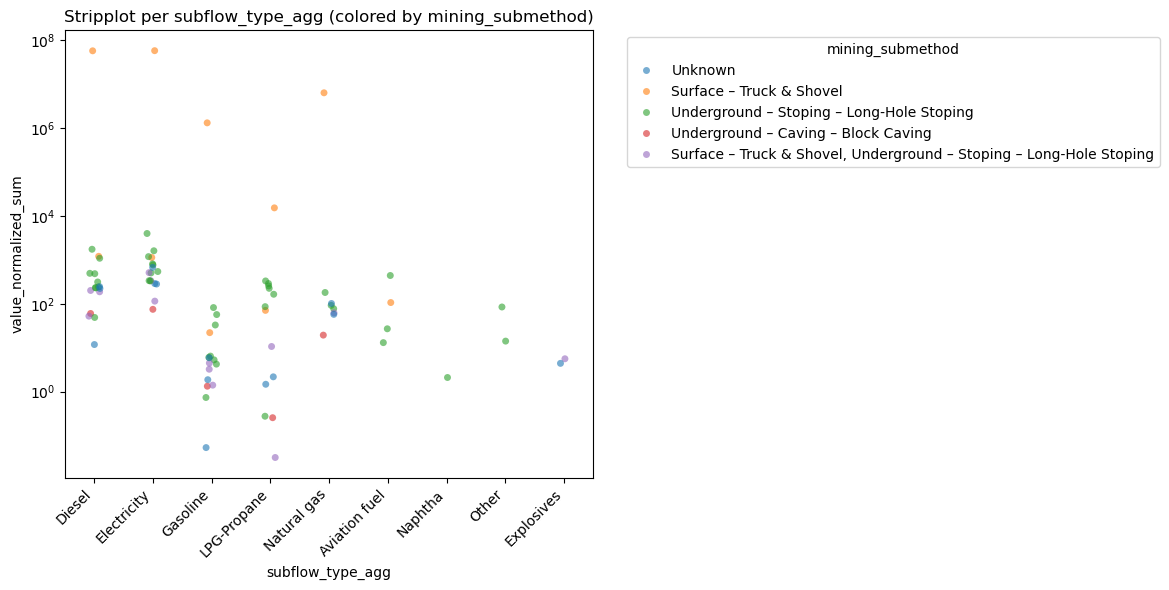

In [294]:
df_plot = merged_df
hue_col = 'mining_submethod'  # Change to None if you don't want to color by archetype

plt.figure(figsize=(12, 6))

if hue_col:
    # Allow NaN values: replace with "Unknown"
    df_plot[hue_col] = df_plot[hue_col].fillna("Unknown")
    sns.stripplot(
        data=df_plot,
        x="subflow_type_agg",
        y="value_normalized_sum",
        hue=hue_col,
        jitter=True,
        alpha=0.6
    )
    plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc='upper left')
else:
    sns.stripplot(
        data=df_plot,
        x="subflow_type_agg",
        y="value_normalized_sum",
        jitter=True,
        alpha=0.6
    )

plt.yscale("log")
plt.xticks(rotation=45, ha="right")
plt.title(f"Stripplot per subflow_type_agg" + (f" (colored by {hue_col})" if hue_col else ""))
plt.xlabel("subflow_type_agg")
plt.ylabel("value_normalized_sum")
plt.tight_layout()
plt.show()

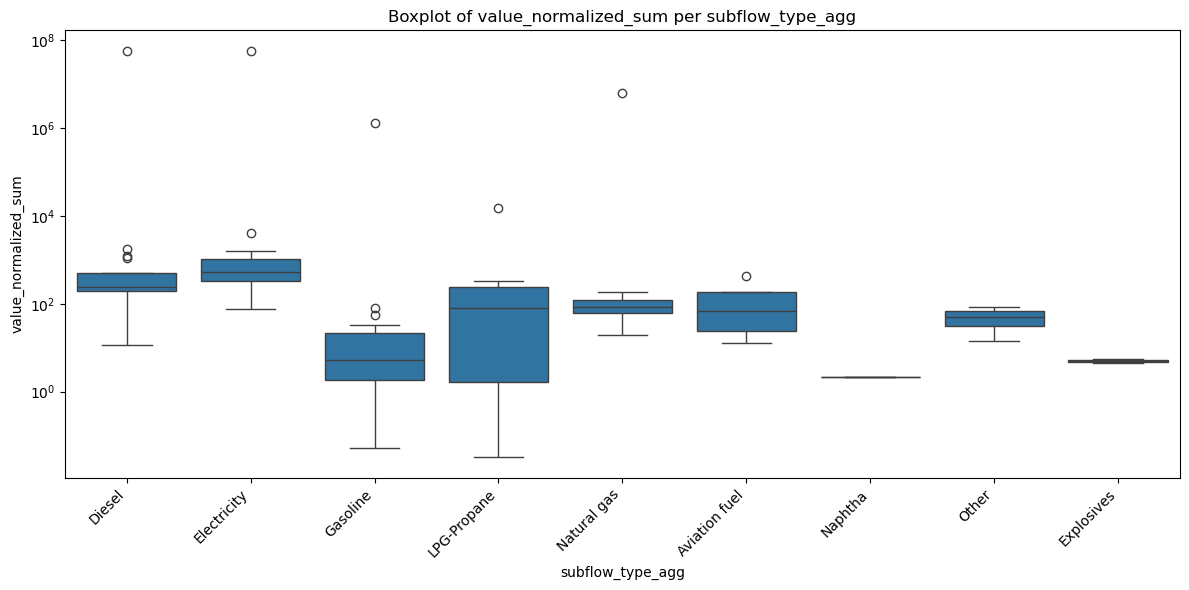

In [284]:
# Create a boxplot to explore variability of value_normalized_sum per subflow_type_agg

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=energy_std_norm_agg,
    x="subflow_type_agg",
    y="value_normalized_sum"
)
plt.xticks(rotation=45, ha="right")
plt.yscale("log")  # log scale to handle large variability
plt.title("Boxplot of value_normalized_sum per subflow_type_agg")
plt.tight_layout()
plt.show()

# Build relationships for parametrization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy import stats

# ---------------------------
# Load and prepare the data
# ---------------------------
df = pd.read_csv("/mnt/data/merged_df.csv")

# Keep positive values only for fitting
df = df[df["value_normalized_sum"] > 0].copy()

# Keep subflow_type_agg and mining_method (or Unknown if NaN)
if "mining_method" in df.columns:
    df["mining_method"] = df["mining_method"].fillna("Unknown")
else:
    df["mining_method"] = "Unknown"

# Ensure required column exists
if "subflow_type_agg" not in df.columns:
    raise ValueError("Column 'subflow_type_agg' is missing from merged_df.csv")

# Candidate distributions and fitting logic
def fit_distributions(x):
    """
    Fit several candidate distributions to data x (>0) and return
    parameters, log-likelihood, AIC, BIC, and KS p-value.
    """
    results = []
    n = len(x)
    x = np.asarray(x, dtype=float)

    # Helper to compute metrics
    def evaluate(name, rv):
        # log-likelihood
        logpdf = rv.logpdf(x)
        ll = np.sum(logpdf[~np.isinf(logpdf)])
        # number of parameters (we fix loc=0 for positive distributions)
        k = 2 if name in ["lognormal", "gamma", "weibull"] else 2  # normal has 2 (mu, sigma)
        aic = 2 * k - 2 * ll
        bic = k * np.log(n) - 2 * ll
        # KS test
        ks_stat, ks_p = stats.kstest(x, rv.cdf)
        return dict(dist=name, ll=ll, aic=aic, bic=bic, ks_p=ks_p, params=rv)

    # LOGNORMAL (scipy: shape=sigma, loc=0, scale=exp(mu))
    try:
        shape, loc, scale = stats.lognorm.fit(x, floc=0)
        rv = stats.lognorm(s=shape, loc=0, scale=scale)
        results.append(evaluate("lognormal", rv))
    except Exception:
        pass

    # GAMMA (shape k, scale theta), loc=0
    try:
        a, loc, scale = stats.gamma.fit(x, floc=0)
        rv = stats.gamma(a=a, loc=0, scale=scale)
        results.append(evaluate("gamma", rv))
    except Exception:
        pass

    # WEIBULL minimum (shape c, scale), loc=0
    try:
        c, loc, scale = stats.weibull_min.fit(x, floc=0)
        rv = stats.weibull_min(c=c, loc=0, scale=scale)
        results.append(evaluate("weibull", rv))
    except Exception:
        pass

    # NORMAL (mu, sigma) on raw data (not ideal for skewed data, but we test)
    try:
        mu, sigma = stats.norm.fit(x)
        rv = stats.norm(loc=mu, scale=max(sigma, 1e-9))
        results.append(evaluate("normal", rv))
    except Exception:
        pass

    # Sort by BIC (more conservative) then AIC
    results = sorted(results, key=lambda d: (d["bic"], d["aic"]))
    return results


# ---------------------------
# Fit per (subflow, archetype)
# ---------------------------
group_cols = ["subflow_type_agg", "mining_method"]
groups = df.groupby(group_cols)

records = []
plots_to_make = []

for (subflow, method), g in groups:
    x = g["value_normalized_sum"].dropna().values
    n = len(x)
    if n <= 5:
        # Too few points: skip fitting and mark as 'insufficient'
        records.append({
            "subflow_type_agg": subflow,
            "archetype": method,
            "n": n,
            "best_dist": "insufficient_data",
            "params_readable": "",
            "AIC": np.nan,
            "BIC": np.nan,
            "KS_p": np.nan
        })
        continue

    fits = fit_distributions(x)
    if not fits:
        records.append({
            "subflow_type_agg": subflow,
            "archetype": method,
            "n": n,
            "best_dist": "fit_failed",
            "params_readable": "",
            "AIC": np.nan,
            "BIC": np.nan,
            "KS_p": np.nan
        })
        continue

    best = fits[0]
    # Extract human-readable parameters depending on the distribution
    rv = best["params"]
    if isinstance(rv, stats._distn_infrastructure.rv_frozen):
        name = best["dist"]
        if name == "lognormal":
            # For lognormal: s = sigma, scale = exp(mu)
            s = rv.kwds.get('s', rv.args[0] if rv.args else None)
            scale = rv.kwds.get('scale', rv.args[-1] if rv.args else None)
            mu = np.log(scale)
            sigma = s
            params_str = f"mu_log={mu:.4g}, sigma_log={sigma:.4g} (scale=exp(mu))"
        elif name == "gamma":
            a = rv.kwds.get('a', rv.args[0] if rv.args else None)
            scale = rv.kwds.get('scale', rv.args[-1] if rv.args else None)
            params_str = f"shape={a:.4g}, scale={scale:.4g}"
        elif name == "weibull":
            c = rv.kwds.get('c', rv.args[0] if rv.args else None)
            scale = rv.kwds.get('scale', rv.args[-1] if rv.args else None)
            params_str = f"shape={c:.4g}, scale={scale:.4g}"
        elif name == "normal":
            params_str = f"mu={rv.kwds.get('loc', 0):.4g}, sigma={rv.kwds.get('scale', 0):.4g}"
        else:
            params_str = str(rv.kwds)
    else:
        params_str = str(rv)

    records.append({
        "subflow_type_agg": subflow,
        "archetype": method,
        "n": n,
        "best_dist": best["dist"],
        "params_readable": params_str,
        "AIC": best["aic"],
        "BIC": best["bic"],
        "KS_p": best["ks_p"]
    })

    # Remember for plotting
    plots_to_make.append(((subflow, method), x, best))

# ---------------------------
# Results table
# ---------------------------
results_df = pd.DataFrame.from_records(records).sort_values(["subflow_type_agg", "archetype"])

# Save CSV
csv_path = "results/best_fit_distributions.csv"
results_df.to_csv(csv_path, index=False)

# ---------------------------
# Create a multi-page PDF with histograms + best-fit PDFs (only groups with n>5)
# ---------------------------
pdf_path = "results/subflow_archetype_fit_plots.pdf"
with PdfPages(pdf_path) as pdf:
    for (subflow, method), x, best in plots_to_make:
        fig, ax = plt.subplots(figsize=(7, 5))
        # Histogram
        ax.hist(x, bins=max(8, int(np.sqrt(len(x)))), density=True)
        # X-range for PDF
        xmin = max(1e-9, np.min(x) * 0.8)
        xmax = np.max(x) * 1.2
        xs = np.linspace(xmin, xmax, 400)
        rv = best["params"]
        # Best-fit PDF
        ax.plot(xs, rv.pdf(xs))
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_title(f"{subflow} | {method}\nBest: {best['dist'].upper()}  (n={len(x)}, BIC={best['bic']:.1f})")
        ax.set_xlabel("value_normalized_sum")
        ax.set_ylabel("Density")
        fig.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)

pdf_path, csv_path


# Grade parametrization

In [ ]:
au_ids = [
'ON-MAIN-687b8c8d',	#Island
'ON-MAIN-7607a50e',	#Young-Davidson
'QC-MAIN-f9e41c2a',	#Lamaque
'GRP-0d911886', #Porcupine #3 sites
'GRP-147b3123', #Timmins Operation #2 sites # Also silver in production
'GRP-14bfbb82', #Seabee Gold Operation #2 sites
'QC-MAIN-9de9bb0d',	#Kiena
'ON-MAIN-c5fefb01',	#Mishi

# Additional ones, only gold in production_df but not in NRCAan
'BC-MAIN-8eb8be0d', #Red Chris
'ON-MAIN-0aadf28f', #Rainy River
'ON-MAIN-538513cd', # Hoyle Pond, Part of Porcupine Complex
'ON-MAIN-fefeaee4', # Musselwhite
'QC-MAIN-02884fb5' #Westwood-Doyon
]